##### PLOTTER OF THE RESULTS OF A GRID SEARCH

In [1]:
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy.stats import t


In [2]:
output_dir = "/home/zhanna/bachelorarbeit/zbb/experiments/output_grid_search_10_12_23"
output_dir = "/home/zhanna/bachelorarbeit/zbb/experiments/output_grid_search_000"

In [19]:
model_names = [
    # "RandomForestW2V",
    # "RandomForest",
    # "LogisticRegression",
    # "LogisticRegressionW2V",
    # "NaiveSA",
    # "AFinn",
    # "Vader"
    "LSTM_W2V"
]

model_name = model_names[0]
file_name = os.path.join(output_dir, 'grid_search_{}.pkl'.format(model_name))
file_name = os.path.join(output_dir, 'grid_search_{}_cv_results.pkl'.format(model_name))

In [20]:
with open(file_name, 'rb') as f:
    results = pickle.load(f)

In [21]:
results_df = pd.DataFrame(results)

In [22]:
import pandas as pd

w2v_path="/data/zibaldone/projects/ai/zbb//data//datasets/googleW2v/word2vec-google-news-300.gz"
try:
    metrics = ['accuracy', 'f1', 'recall', 'precision']
    metric = metrics[0]
    results_df = results_df.sort_values(by=["rank_test_{}".format(metric)])
except:
    metrics = ['score']
    metric = metrics[0]
    results_df = results_df.sort_values(by=["rank_test_{}".format(metric)])
if model_name.startswith("RandomForest"):
    print(model_name)
    results_df = results_df.set_index(results_df["params"].apply(
        lambda x: "_".join(
            str(val).replace(w2v_path, '')
                    .replace('1', '')
                    .replace('5', '') 
                    .replace('reviews_no_stopwords', 'R.noS.') 
                    .replace('reviews_no_punctuation', 'R.noP.') 
                    .replace('stamm_no_punctuation', 'S.noP.') 
                    .replace('stamm_no_stop_punct', 'S.noS.P.') 
                    for val in x.values()))).rename_axis("hyperparam")
if model_name.startswith("LogisticReg"):
    print(model_name)
    results_df = results_df.set_index(results_df["params"].apply(
        lambda x: '{' + ",".join([v.replace('_', '') for v in
            [str(val).replace(w2v_path, '')
                    .replace('None', '') 
                    .replace('True', '') 
                    .replace('l2', '') 
                    .replace('reviews_no_stopwords', 'R.noS.') 
                    .replace('reviews_no_punctuation', 'R.noP.') 
                    .replace('stamm_no_punctuation', 'S.noP.') 
                    .replace('stamm_no_stop_punct', 'S.noS.P.') 
                    for val in x.values()]])
    .replace(',,', '').replace('_1_', ', ').replace('.0', '.0, ') + '}'
                    )).rename_axis("hyperparam")
else:
    results_df = results_df.set_index(results_df["params"].apply(lambda x: "_".join(str(val).replace(w2v_path, '') for val in x.values()))).rename_axis("kernel")
# results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]
columns = [
    "mean_test_{}",
    # "std_test_{}",
     ]
projec = ['rank_test_{}'.format(metric)]
for m in metrics:
    for c in columns:
        projec.append(c.format(m))
results_df[
    ["rank_test_{}".format(metric), 
     "mean_test_{}".format(metric), 
     # "std_test_{}".format(metric)
     ]
     ]

results_metrics = results_df[projec]
list_columns = results_metrics.columns
map_rename = {}
for c in list_columns:
    map_rename[c] = c.replace('rank_test_accuracy', 'rank').replace('_test_', ' ')
print(map_rename)

results_metrics = results_metrics.rename(columns=map_rename)
results_metrics

{'rank_test_accuracy': 'rank', 'mean_test_accuracy': 'mean accuracy', 'mean_test_f1': 'mean f1', 'mean_test_recall': 'mean recall', 'mean_test_precision': 'mean precision'}


,rank,mean accuracy,mean f1,mean recall,mean precision
kernel,,,,,
stamm_no_stop_punct_1_True_5_True_relu_64_300_/usr/src/myapp//data//datasets/googleW2v/word2vec-google-news-300.gz_softmax_1_/usr/src/myapp//data//datasets/all_words.csv,1,0.82240,0.821506,0.82060,0.827364
reviews_no_stopwords_1_True_5_True_relu_64_300_/usr/src/myapp//data//datasets/googleW2v/word2vec-google-news-300.gz_softmax_1_/usr/src/myapp//data//datasets/all_words.csv,2,0.81944,0.819556,0.82046,0.819618
reviews_no_punctuation_1_True_5_True_relu_64_300_/usr/src/myapp//data//datasets/googleW2v/word2vec-google-news-300.gz_softmax_1_/usr/src/myapp//data//datasets/all_words.csv,3,0.80819,0.810798,0.82574,0.803078


In [10]:
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_data_selector__dimension,param_data_selector__verbose,param_lstm_sa__epoches,param_lstm_sa__verbose,param_vect__max_features,param_vect__norm,...,split13_test_f1,split14_test_f1,split15_test_f1,split16_test_f1,split17_test_f1,split18_test_f1,split19_test_f1,mean_test_f1,std_test_f1,rank_test_f1
kernel,,,,,,,,,,,,,,,,,,,,,
stamm_no_stop_punct_1_5_1_1000_l2_True,4611.443445,1477.337840,204.525806,68.441743,stamm_no_stop_punct,1,5,1,1000,l2,...,0.851026,0.852889,0.867190,0.866483,0.860400,0.852320,0.863315,0.858800,0.006873,3
reviews_no_punctuation_1_5_1_1000_l2_True,9817.222041,960.668428,456.731270,66.147260,reviews_no_punctuation,1,5,1,1000,l2,...,0.856614,0.862270,0.863857,0.860154,0.855685,0.853127,0.850163,0.859849,0.004631,1
reviews_no_stopwords_1_5_1_1000_l2_True,3146.533159,465.952072,205.432964,43.366251,reviews_no_stopwords,1,5,1,1000,l2,...,0.864476,0.858428,0.860757,0.862773,0.866296,0.861895,0.845112,0.859225,0.007382,2
stamm_no_stop_punct_1_5_1_500_l2_True,4764.918236,504.289032,231.558243,37.239028,stamm_no_stop_punct,1,5,1,500,l2,...,0.819559,0.843921,0.845199,0.849003,0.850733,0.840831,0.848327,0.843736,0.007418,4
reviews_no_stopwords_1_5_1_500_l2_True,2425.827450,248.454234,167.642861,27.849273,reviews_no_stopwords,1,5,1,500,l2,...,0.844966,0.843637,0.841270,0.839506,0.817495,0.845538,0.836098,0.837441,0.007256,5
reviews_no_punctuation_1_5_1_500_l2_True,9049.396769,1248.124896,367.754589,59.826268,reviews_no_punctuation,1,5,1,500,l2,...,0.840915,0.830106,0.840733,0.836163,0.829449,0.845629,0.834673,0.835485,0.008466,6


In [11]:
results_df.params.iloc[0]

{'data_selector__dimension': 'stamm_no_stop_punct',
 'data_selector__verbose': 1,
 'lstm_sa__epoches': 5,
 'lstm_sa__verbose': 1,
 'vect__max_features': 1000,
 'vect__norm': 'l2',
 'vect__use_idf': True}

In [12]:
results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_data_selector__dimension', 'param_data_selector__verbose',
       'param_lstm_sa__epoches', 'param_lstm_sa__verbose',
       'param_vect__max_features', 'param_vect__norm',
       ...
       'split13_test_f1', 'split14_test_f1', 'split15_test_f1',
       'split16_test_f1', 'split17_test_f1', 'split18_test_f1',
       'split19_test_f1', 'mean_test_f1', 'std_test_f1', 'rank_test_f1'],
      dtype='object', length=104)

In [13]:
print(results_df[["mean_fit_time", "mean_score_time"]].to_latex())

\begin{tabular}{lrr}
\toprule
 & mean_fit_time & mean_score_time \\
kernel &  &  \\
\midrule
stamm_no_stop_punct_1_5_1_1000_l2_True & 4611.443445 & 204.525806 \\
reviews_no_punctuation_1_5_1_1000_l2_True & 9817.222041 & 456.731270 \\
reviews_no_stopwords_1_5_1_1000_l2_True & 3146.533159 & 205.432964 \\
stamm_no_stop_punct_1_5_1_500_l2_True & 4764.918236 & 231.558243 \\
reviews_no_stopwords_1_5_1_500_l2_True & 2425.827450 & 167.642861 \\
reviews_no_punctuation_1_5_1_500_l2_True & 9049.396769 & 367.754589 \\
\bottomrule
\end{tabular}



In [14]:
print(results_df[["rank_test_{}".format(metric), "mean_test_{}".format(metric), "std_test_{}".format(metric)]].to_latex())

\begin{tabular}{lrrr}
\toprule
 & rank_test_accuracy & mean_test_accuracy & std_test_accuracy \\
kernel &  &  &  \\
\midrule
stamm_no_stop_punct_1_5_1_1000_l2_True & 1 & 0.858546 & 0.004520 \\
reviews_no_punctuation_1_5_1_1000_l2_True & 2 & 0.858330 & 0.006397 \\
reviews_no_stopwords_1_5_1_1000_l2_True & 3 & 0.858236 & 0.005268 \\
stamm_no_stop_punct_1_5_1_500_l2_True & 4 & 0.843704 & 0.003696 \\
reviews_no_stopwords_1_5_1_500_l2_True & 5 & 0.837368 & 0.003669 \\
reviews_no_punctuation_1_5_1_500_l2_True & 6 & 0.829594 & 0.014293 \\
\bottomrule
\end{tabular}



shape:  (3, 10)


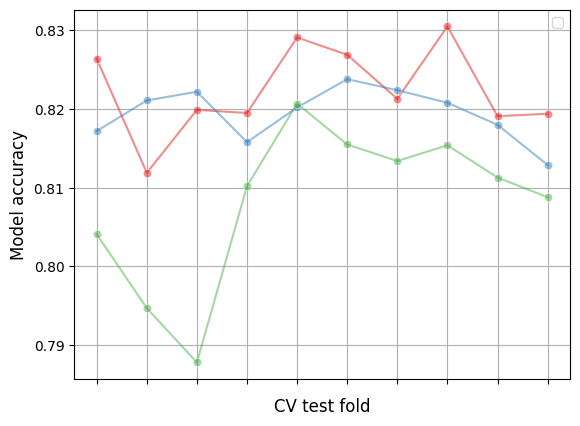

Correlation of models:
 kernel                                              stamm_no_stop_punct_1_True_5_True_relu_64_300_/usr/src/myapp//data//datasets/googleW2v/word2vec-google-news-300.gz_softmax_1_/usr/src/myapp//data//datasets/all_words.csv  \
kernel                                                                                                                                                                                                                          
stamm_no_stop_punct_1_True_5_True_relu_64_300_/...                                           1.000000                                                                                                                           
reviews_no_stopwords_1_True_5_True_relu_64_300_...                                           0.195781                                                                                                                           
reviews_no_punctuation_1_True_5_True_relu_64_30...                          

<Axes: xlabel='kernel', ylabel='kernel'>

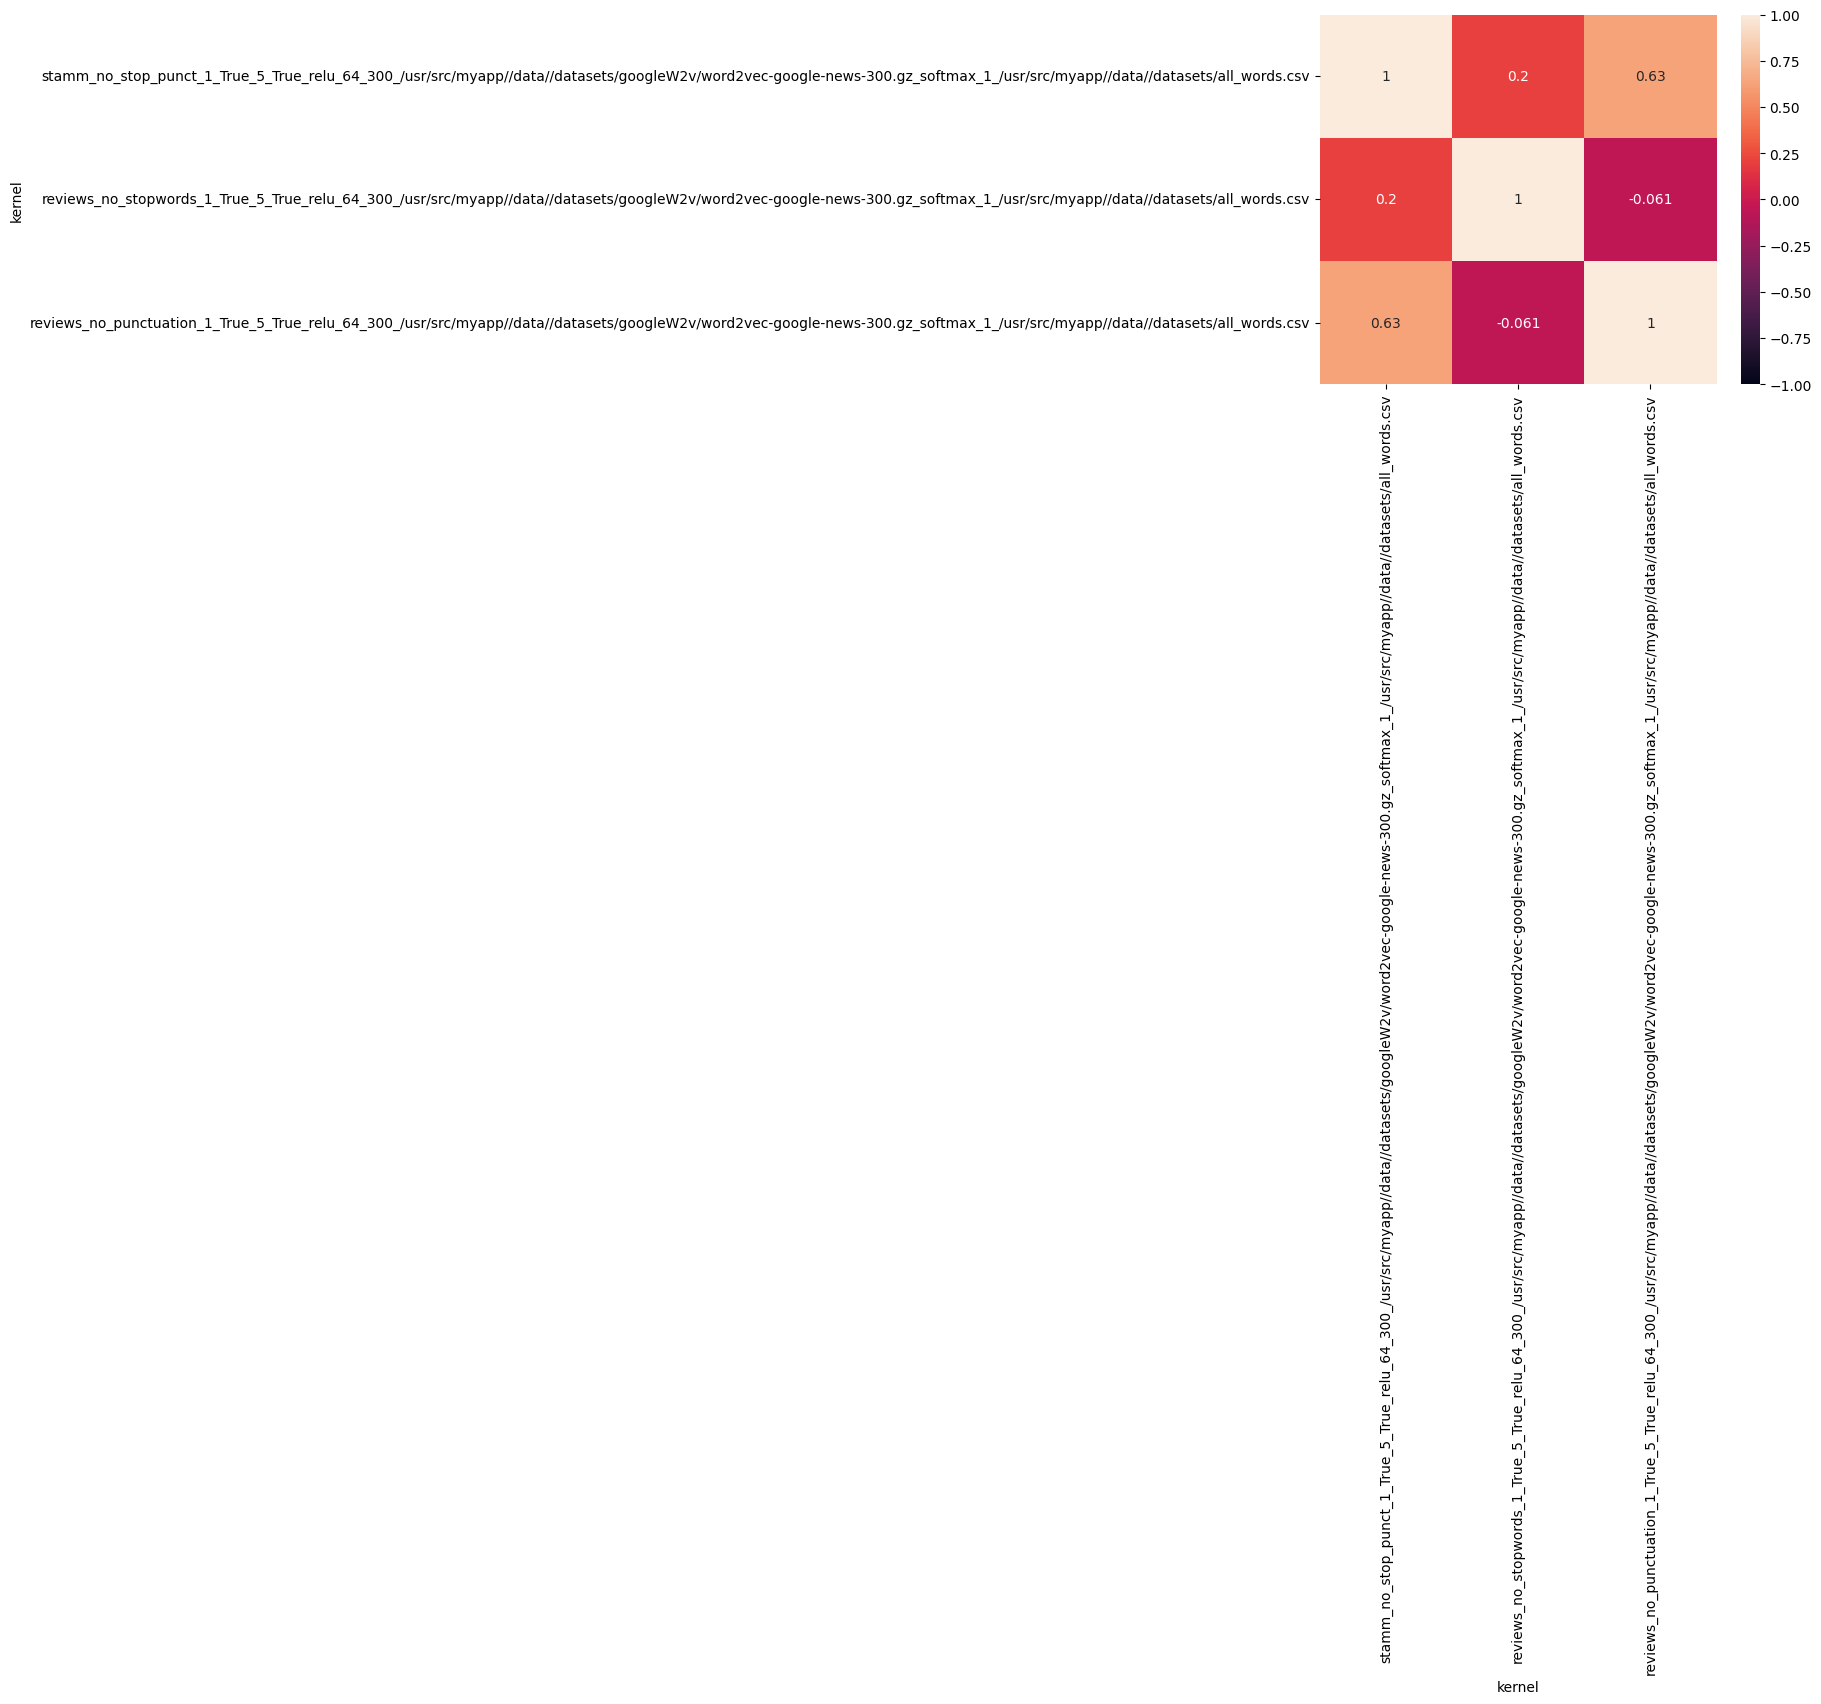

In [25]:
# create df of model scores ordered by performance
model_scores = results_df.filter(regex=r"split\d*_test_{}".format(metric))
print("shape: ", model_scores.shape)

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose(),
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.grid('minor')
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model accuracy", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.legend([])
plt.show()

corr = model_scores.transpose().corr()
# print correlation of AUC scores across folds
print(f"Correlation of models:\n {corr}")

# corr.style.background_gradient(cmap='coolwarm')
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, vmin=-1, vmax=1, annot=True)

In [ ]:
results_df

In [27]:
def corrected_std(differences, n_train, n_test):
    """Corrects standard deviation using Nadeau and Bengio's approach.

    Parameters
    ----------
    differences : ndarray of shape (n_samples,)
        Vector containing the differences in the score metrics of two models.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    corrected_std : float
        Variance-corrected standard deviation of the set of differences.
    """
    # kr = k times r, r times repeated k-fold crossvalidation,
    # kr equals the number of times the model was evaluated
    kr = len(differences)
    corrected_var = np.var(differences, ddof=1) * (1 / kr + n_test / n_train)
    corrected_std = np.sqrt(corrected_var)
    return corrected_std


def compute_corrected_ttest(differences, df, n_train, n_test):
    """Computes right-tailed paired t-test with corrected variance.

    Parameters
    ----------
    differences : array-like of shape (n_samples,)
        Vector containing the differences in the score metrics of two models.
    df : int
        Degrees of freedom.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    t_stat : float
        Variance-corrected t-statistic.
    p_val : float
        Variance-corrected p-value.
    """
    mean = np.mean(differences)
    std = corrected_std(differences, n_train, n_test)
    t_stat = mean / std
    p_val = t.sf(np.abs(t_stat), df)  # right-tailed t-test
    return t_stat, p_val

In [29]:
try:
    n_train = results['n_train']
    n_test = results['n_test']
except:
    n_train = 45000
    n_test = 5000

In [30]:
print(n_train, n_test)

45000 5000


In [31]:
model_1_scores = model_scores.iloc[0].values  # scores of the best model
model_2_scores = model_scores.iloc[1].values  # scores of the second-best model

differences = model_1_scores - model_2_scores

n = differences.shape[0]  # number of test sets
df = n - 1
# n_train = len(list(cv.split(X, y))[0][0])
# n_test = len(list(cv.split(X, y))[0][1])

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 1.067
Corrected p-value: 0.157


In [32]:
t_stat_uncorrected = np.mean(differences) / np.sqrt(np.var(differences, ddof=1) / n)
p_val_uncorrected = t.sf(np.abs(t_stat_uncorrected), df)

print(
    f"Uncorrected t-value: {t_stat_uncorrected:.3f}\n"
    f"Uncorrected p-value: {p_val_uncorrected:.3f}"
)

Uncorrected t-value: 1.550
Uncorrected p-value: 0.078


In [ ]:
# initialize random variable
t_post = t(
    df, loc=np.mean(differences), scale=corrected_std(differences, n_train, n_test)
)

In [ ]:
x = np.linspace(t_post.ppf(0.001), t_post.ppf(0.999), 100)

plt.plot(x, t_post.pdf(x))
plt.grid('minor')
plt.xticks(np.arange(-0.04, 0.06, 0.01))
plt.fill_between(x, t_post.pdf(x), 0, facecolor="blue", alpha=0.2)
plt.ylabel("Probability density")
plt.xlabel(r"Mean difference ($\mu$)")
plt.title("Posterior distribution")
plt.show()

In [ ]:
better_prob = 1 - t_post.cdf(0)

print(
    f"Probability of {model_scores.index[0]} being more accurate than "
    f"{model_scores.index[1]}: {better_prob:.3f}"
)
print(
    f"Probability of {model_scores.index[1]} being more accurate than "
    f"{model_scores.index[0]}: {1 - better_prob:.3f}"
)

In [ ]:
rope_interval = [-0.01, 0.01]
rope_prob = t_post.cdf(rope_interval[1]) - t_post.cdf(rope_interval[0])

print(
    f"Probability of {model_scores.index[0]} and {model_scores.index[1]} "
    f"being practically equivalent: {rope_prob:.3f}"
)


In [ ]:
x_rope = np.linspace(rope_interval[0], rope_interval[1], 100)

plt.plot(x, t_post.pdf(x))
plt.grid('minor')
plt.xticks(np.arange(-0.04, 0.06, 0.01))
plt.vlines([-0.005, 0.005], ymin=0, ymax=(np.max(t_post.pdf(x)) + 1))
plt.fill_between(x_rope, t_post.pdf(x_rope), 0, facecolor="blue", alpha=0.2)
plt.ylabel("Probability density")
plt.xlabel(r"Mean difference ($\mu$)")
plt.title("Posterior distribution under the ROPE")
plt.show()

In [ ]:
cred_intervals = []
intervals = [0.5, 0.75, 0.95]

for interval in intervals:
    cred_interval = list(t_post.interval(interval))
    cred_intervals.append([interval, cred_interval[0], cred_interval[1]])

cred_int_df = pd.DataFrame(
    cred_intervals, columns=["interval", "lower value", "upper value"]
).set_index("interval")
cred_int_df

In [ ]:
from itertools import combinations
from math import factorial

n_comparisons = factorial(len(model_scores)) / (
    factorial(2) * factorial(len(model_scores) - 2)
)
pairwise_t_test = []

for model_i, model_k in combinations(range(len(model_scores)), 2):
    model_i_scores = model_scores.iloc[model_i].values
    model_k_scores = model_scores.iloc[model_k].values
    differences = model_i_scores - model_k_scores
    t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
    p_val *= n_comparisons  # implement Bonferroni correction
    # Bonferroni can output p-values higher than 1
    p_val = 1 if p_val > 1 else p_val
    pairwise_t_test.append(
        [model_scores.index[model_i], model_scores.index[model_k], t_stat, p_val]
    )

pairwise_comp_df = pd.DataFrame(
    pairwise_t_test, columns=["model_1", "model_2", "t_stat", "p_val"]
).round(3)
pairwise_comp_df

In [ ]:
print(pairwise_comp_df.to_latex())

In [ ]:


pairwise_bayesian = []

for model_i, model_k in combinations(range(len(model_scores)), 2):
    model_i_scores = model_scores.iloc[model_i].values
    model_k_scores = model_scores.iloc[model_k].values
    differences = model_i_scores - model_k_scores
    t_post = t(
        df, loc=np.mean(differences), scale=corrected_std(differences, n_train, n_test)
    )
    worse_prob = t_post.cdf(rope_interval[0])
    better_prob = 1 - t_post.cdf(rope_interval[1])
    rope_prob = t_post.cdf(rope_interval[1]) - t_post.cdf(rope_interval[0])

    pairwise_bayesian.append([worse_prob, better_prob, rope_prob])

pairwise_bayesian_df = pd.DataFrame(
    pairwise_bayesian, columns=["worse_prob", "better_prob", "rope_prob"]
).round(3)

pairwise_comp_df = pairwise_comp_df.join(pairwise_bayesian_df)
pairwise_comp_df
